* importing packages

In [42]:
from numpy import linspace, pi
from matplotlib.pyplot import show, figure
from matplotlib import rcParams
from magpylib.source.magnet import Cylinder
from magpylib import Collection, displaySystem

from magforce import plot_1D_along_x, plot_1D_along_y, plot_1D_along_z
from magforce import plot_2D_plane_x, plot_2D_plane_y, plot_2D_plane_z
from magforce import plot_3D
from magforce import getF

* setting up figure size for notebook

In [43]:
# make figures bigger on notebook
width = 9
height = 9
rcParams['figure.figsize'] = [width, height]

* defining a cobalt spherical sample, with 4mm diameter, Ms of 1.4e6 A/m and demagnetizing factor of 1/3

* the sample variable needs to be a dictionary for magforce's functions to work, and it must include the 'demagnetizing_factor', 'volume' and 'M_saturation' keys

In [44]:
demagnetizing_factor = 1/3             # sphere
volume = 4 / 3 * pi * (4 / 1000) ** 3  # V sphere r=4mm [m3]
M_saturation = 1.400e6                 # Ms Co room temperature [A/m]

sample = {'demagnetizing_factor': demagnetizing_factor, 
          'volume': volume, 
          'M_saturation': M_saturation}

* defining diferent magnets

* cylindre_20_50
    * mag 1300mT
    * 20mm diametre
    * 50mm hauteur
    * suface du haut a z=0

In [45]:
cylindre_20_50 = Cylinder(mag=[0, 0, 1300], 
                          dim=[20, 50], 
                          pos=[0, 0, -50])

* couronne_10_20_50_h
    * mag 1300mT vers haut
    * 10mm diametre interne
    * 20mm diametre externe
    * 50mm hauteur
    * suface du bas a z=0

In [46]:
couronne_10_20_50_h_out = Cylinder(mag=[0, 0, 1300], 
                                 dim=[20, 50], 
                                 pos=[0, 0, 50])

couronne_10_20_50_h_in = Cylinder(mag=[0, 0, -1300], 
                                dim=[10, 50], 
                                pos=[0, 0, 50])

couronne_10_20_50_h = Collection(couronne_10_20_50_h_out, couronne_10_20_50_h_in)

* couronne_10_20_50_b
    * mag 1300mT vers bas
    * 10mm diametre interne
    * 20mm diametre externe
    * 50mm hauteur
    * suface du bas a z=0

In [47]:
couronne_10_20_50_b_out = Cylinder(mag=[0, 0, -1300], 
                                 dim=[20, 50], 
                                 pos=[0, 0, 50])

couronne_10_20_50_b_in = Cylinder(mag=[0, 0, 1300], 
                                dim=[10, 50], 
                                pos=[0, 0, 50])

couronne_10_20_50_b = Collection(couronne_10_20_50_b_out, couronne_10_20_50_b_in)

* collections
    * cylindre + couronne vers haut
    * cylindre + couronne vers bas

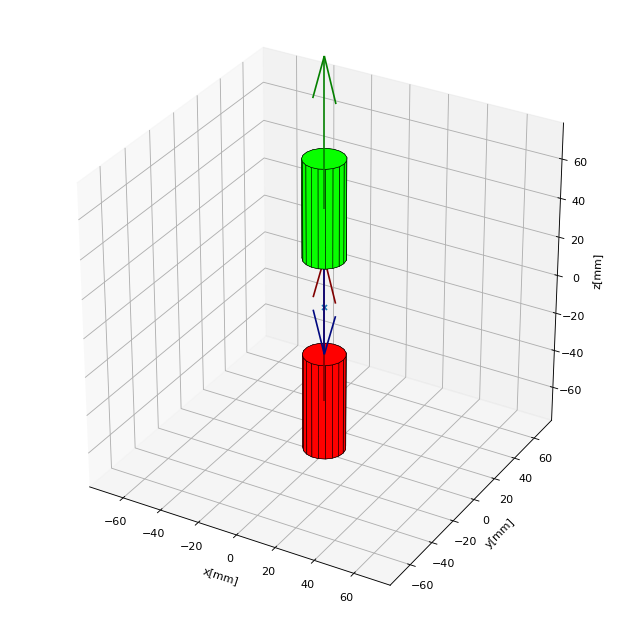

In [48]:
cyl_cou_h = Collection(cylindre_20_50, couronne_10_20_50_h)

displaySystem(cyl_cou_h, direc=True)

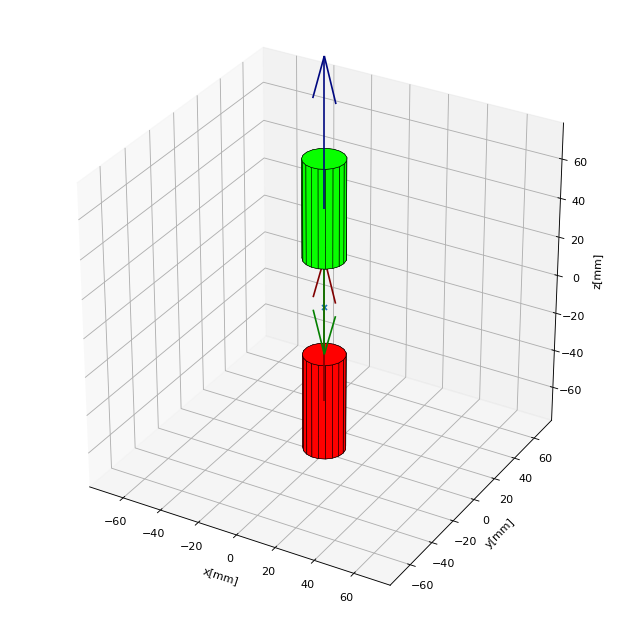

In [49]:
cyl_cou_b = Collection(cylindre_20_50, couronne_10_20_50_b)

displaySystem(cyl_cou_b, direc=True)

* etude dans l'axe

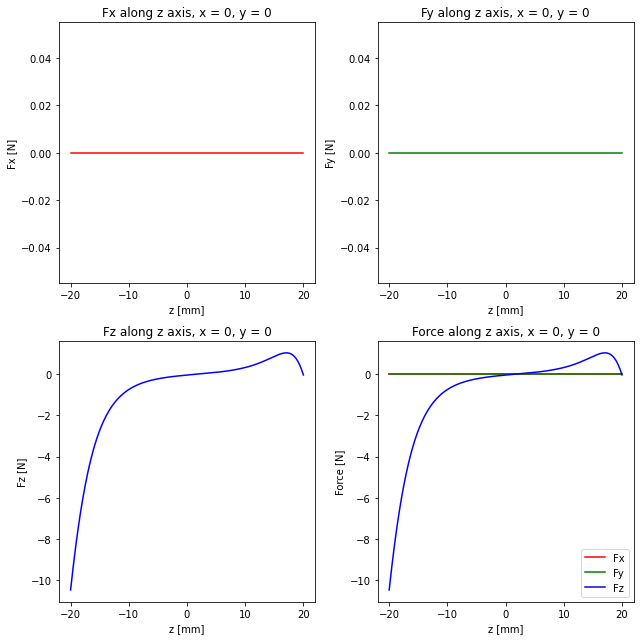

In [50]:
# plot for cyl + couronne haut, dans l'axe
plot_1D_along_z(x = 0, 
                y = 0, 
                zs = linspace(-20, 20, 1000), 
                collection = cyl_cou_h, 
                sample = sample, 
                BF = 'F', 
                saveCSV = False)

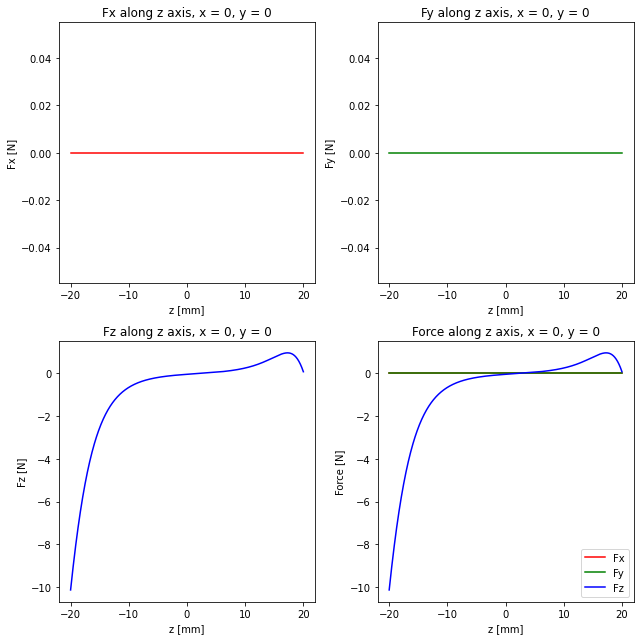

In [51]:
# plot for cyl + couronne bas, dans l'axe
plot_1D_along_z(x = 0, 
                y = 0, 
                zs = linspace(-20, 20, 1000), 
                collection = cyl_cou_b, 
                sample = sample, 
                BF = 'F', 
                saveCSV = False)

* etude hors l'axe (2mm en x 2mm en y)

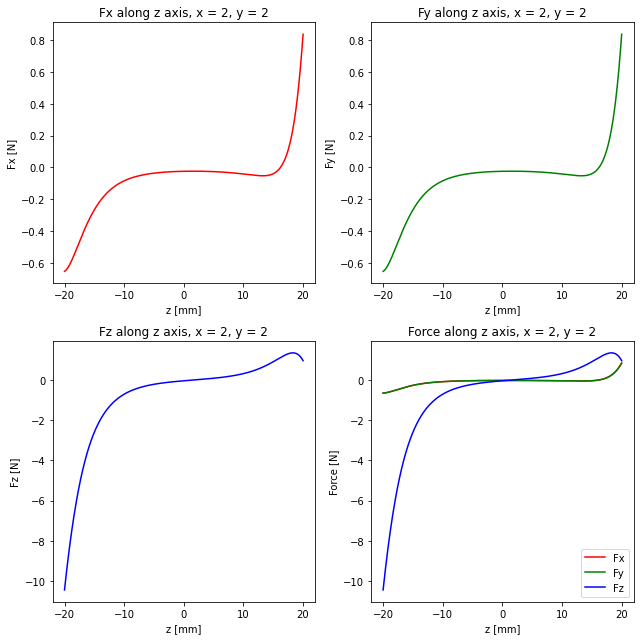

In [52]:
# plot for cyl + couronne haut, hors l'axe
plot_1D_along_z(x = 2, 
                y = 2, 
                zs = linspace(-20, 20, 1000), 
                collection = cyl_cou_h, 
                sample = sample, 
                BF = 'F', 
                saveCSV = False)

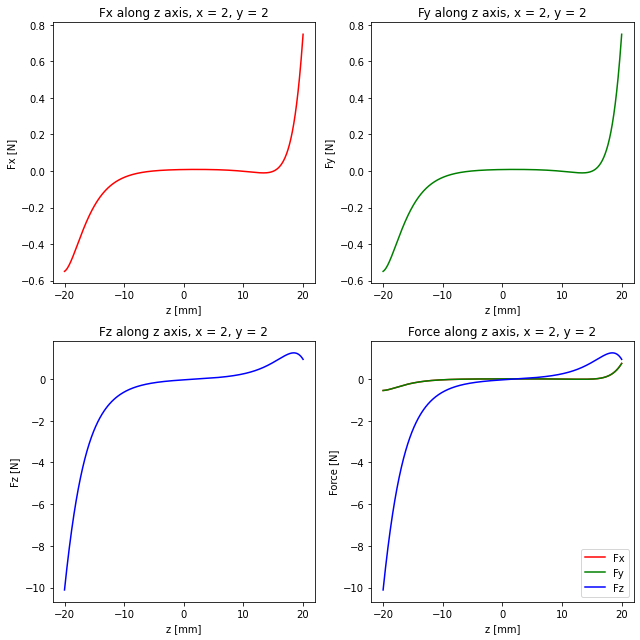

In [53]:
# plot for cyl + couronne bas, hors l'axe
plot_1D_along_z(x = 2, 
                y = 2, 
                zs = linspace(-20, 20, 1000), 
                collection = cyl_cou_b, 
                sample = sample, 
                BF = 'F', 
                saveCSV = False)